## Correlative Analysis and Statistical Connections on High Dimensional RNA sequence for 130 NSCLC patients
#### Team Members: Sahar Zaidi, Leonardo Buitrago, Severin Vihossi 
#### December 12, 2022

##### Introduction:

The main objective of the project consisted of performing a correlative analysis of a high dimensional RNA sequence for 130 NSCLC patients. Our group focused on finding the RNA expressions with the most correlation out of all the others in the dataset.

In [4]:
#importing 
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import stats
from scipy.stats.stats import kendalltau
from scipy.stats import spearmanr
from scipy.stats import pearsonr

In [4]:
im = pd.read_csv('C:/Users/sahar/Downloads/ENBCProject/RNAseq-Sandy130-cleaned3-95prc.csv', index_col=0) #uploading the dataset provided

In [5]:
def Zscore_col(data):
   # IN: is a column matrix (data frame)
    cols= list(data.columns)
    data[cols]

    for col in cols:
        #col_zscore = col + '_zscore'
        data[col] = (data[col] - data[col].mean())/data[col].std(ddof=0)
        #print(col)
    #data
    return (data) 
    #np.where(mask, out, x)
    
im = Zscore_col(im.T) #conducting a Z score test on the provided data
im

names,A2M,A4GALT,AAAS,AACS,AAGAB,AAK1,AAMP,AARS,AARS2,AASDH,...,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3
R01-023,-0.373860,-0.309904,-1.166407,-0.817350,-0.174620,0.097847,-0.867469,-0.932954,-1.242375,-0.591009,...,-0.125219,-1.108324,-0.792799,0.700374,-1.011444,0.091473,-0.761321,-0.391312,-0.112322,-0.109214
R01-024,-0.656108,-0.295493,0.105409,-0.745949,-0.413720,-0.338188,-0.408105,-0.574487,-1.038543,-0.581739,...,-0.529135,1.837880,-0.094695,-1.132928,-0.908740,0.170071,-0.717723,-0.429388,-0.933301,-0.427518
R01-006,-0.563152,-0.381716,-0.519268,-0.744507,-0.982672,-1.340687,0.821634,-0.840842,-0.503826,-0.589051,...,-0.166083,-0.538604,-0.459760,2.372994,-0.282305,0.844879,-0.706706,-0.945722,-0.851367,0.382350
R01-153,-0.031837,-0.436105,0.046065,0.129170,-0.301981,-0.621912,0.217499,0.223407,-0.190703,-0.577517,...,-0.529064,0.494956,0.260814,0.357061,-0.347406,0.901879,-0.750692,1.208516,0.345115,0.387763
R01-031,-0.694793,-0.391871,-0.047936,-0.368143,-1.034968,-0.262273,1.669731,-0.266115,-0.391005,-0.595002,...,-0.979802,-0.328686,-0.104785,-0.975311,-0.000212,0.385293,-0.663715,-0.096697,0.214888,0.507413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R01-141,0.464696,-0.279997,0.280279,-0.525454,1.009819,-0.594307,-0.753071,-0.773376,0.034584,-0.470697,...,1.843901,1.893290,0.441293,-0.322938,-0.571056,0.744051,1.638566,-0.655215,-0.220240,0.120661
R01-142,1.395563,-0.259866,-0.220600,-0.697211,0.140134,0.361038,-0.207822,-0.336940,1.271486,-0.541456,...,-0.605544,0.680804,-0.792799,-0.075005,1.104894,-0.915770,0.784038,0.646373,-0.479799,0.215375
R01-144,0.575808,-0.476281,-0.154943,-1.038908,-0.078079,-0.619844,0.205236,-0.858807,0.630331,-0.537478,...,0.085078,1.860729,-0.473081,0.667191,1.593344,0.098350,1.243017,-0.276793,-1.332501,-0.426604
R01-145,0.976693,-0.187485,-0.231683,-0.822110,-0.177573,0.363889,-0.215765,-0.049512,0.094588,1.252644,...,-0.387027,-0.752550,-0.113259,-0.204505,-0.666063,-1.104802,1.025239,0.977336,-0.294712,-0.276136


##### Methods: 

To begin, the RNA dataset variables had to be normalized using the Z-score method which were compared to the mean of the whole dataset. Our code consisted of a for-loop that would iterate through the normalized data and perform each statistical test. The resulting data was then put into a new separate data frame which was also part of the for-loop. 

In [6]:
im.to_csv(r'C:/Users/sahar/Downloads/ENBCProject/zscoredRNA.csv') #creating a csv file with the Z score test data

In [5]:
mrna_data = pd.read_csv('C:/Users/sahar/Downloads/ENBCProject/zscoredRNA.csv', index_col = 0) #reading the Z scored data csv
subset1 = ['MAX','MUC1','MUC4','VEGFA','VEGFB','EGFR','MDK','TP53','TGFB1','PTEN','CDH1','ERBB2','CTNNB1','GJA1','STAT3','DHX36','FUS','UBTF','DDX17','FTO','PTBP1','TP53','ELAVL1','PVT1', 'TERC','U2AF2','ESRP1',
         'TSN','YTHDF2','RBM5','EML4','PIK3CA','HIF1A','BCL2','RELA','THRB','KRT19','AKT1','PDGFRA','FNBP1','AKT3',
         'HERC1','COL4A1','TOLLIP','ARRB1','FZD4','PIK3R1','BRAF','CCNI','ABCC4','SLC39A8','DAG1','ZNF71','REV3L'] #list of RNA expressions of interest

In [6]:
mrna_needed = mrna_data[subset1] #table of RNA expressions of interest with their z score
mrna_needed.index.names = ['Patient'] 
mrna_needed

,MAX,MUC1,MUC4,VEGFA,VEGFB,EGFR,MDK,TP53,TGFB1,PTEN,...,ARRB1,FZD4,PIK3R1,BRAF,CCNI,ABCC4,SLC39A8,DAG1,ZNF71,REV3L
Patient,,,,,,,,,,,,,,,,,,,,,
R01-023,-0.657025,-0.063603,-0.236067,-0.674131,-1.219220,0.048063,-0.705673,-0.804730,-0.795729,0.775277,...,0.707473,-0.467850,1.240318,0.062266,-0.213070,-0.378035,0.385637,-0.828392,0.413955,2.072218
R01-024,-1.196320,0.640585,-0.500961,-0.238785,-0.971481,-0.151435,-0.615868,-0.764743,0.002267,-0.092214,...,-0.792344,0.498097,-0.611414,0.215205,-1.354935,0.041635,5.489824,-0.752388,-1.348546,-0.061646
R01-006,1.166390,1.678588,2.215893,-0.676204,0.767338,-0.139485,-0.322361,2.056880,-1.199555,-0.636150,...,-0.579785,0.784679,-0.695562,-0.511269,1.408986,-0.040340,-0.537774,4.733812,-0.864296,-0.280968
R01-153,1.216106,0.173541,-0.771795,-0.778742,0.276984,-0.150368,0.160216,0.633209,1.374420,-0.683292,...,-0.826432,0.113088,-0.546550,-0.895995,1.167557,-0.522902,-0.206980,0.439536,-0.837919,-0.788441
R01-031,-0.906286,-0.702918,-0.666912,-0.075093,0.198535,-0.133675,0.313453,-0.478077,-0.123855,-0.654183,...,-0.843121,-0.127176,-0.794157,-0.694094,0.239941,-0.631399,-0.697444,-0.249602,0.557111,-0.845783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R01-141,0.198512,-0.668534,-0.771795,-0.739969,-2.151286,-0.149690,-0.668455,1.888657,-0.291970,0.115710,...,-0.390854,-0.641018,1.228221,0.590404,0.124324,-0.546153,-0.658369,-0.926075,-0.064628,1.396384
R01-142,-0.013055,-0.171588,-0.461941,-0.301635,-0.195464,-0.126899,-0.461415,-0.291653,0.107668,-0.054260,...,0.860723,-0.062055,0.898528,0.154387,0.102010,0.188862,-0.463881,-0.301139,1.398429,0.654982
R01-144,0.558988,-0.018825,-0.234069,-0.147648,-0.003594,-0.098067,0.193886,-0.751604,0.967436,0.108015,...,1.488826,1.014553,-0.260317,0.249503,0.823611,1.215628,2.993872,-0.397912,0.012759,0.709183


In [7]:
mrna_kendall = mrna_needed.corr(method = "kendall") #Kendall Test on RNA expressions of interest
mrna_kendall

,MAX,MUC1,MUC4,VEGFA,VEGFB,EGFR,MDK,TP53,TGFB1,PTEN,...,ARRB1,FZD4,PIK3R1,BRAF,CCNI,ABCC4,SLC39A8,DAG1,ZNF71,REV3L
MAX,1.000000,0.033156,0.044693,0.166369,0.080978,-0.044484,0.083840,0.113894,0.102922,0.009899,...,0.108885,0.132976,0.206679,0.069767,0.110078,0.114848,0.052832,0.159928,0.091134,0.023733
MUC1,0.033156,1.000000,0.001198,-0.090643,0.158626,-0.029578,0.184149,0.175562,-0.171984,0.123323,...,0.204425,0.125708,0.030533,0.166021,0.098515,0.232811,0.392391,0.278132,0.052645,0.126185
MUC4,0.044693,0.001198,1.000000,0.037503,-0.112750,-0.026720,-0.013540,-0.027199,-0.091182,-0.040379,...,-0.006590,-0.004194,-0.132400,-0.145341,-0.069136,-0.039900,-0.124732,0.102445,-0.073249,-0.118980
VEGFA,0.166369,-0.090643,0.037503,1.000000,0.070722,0.154204,0.120811,0.049732,0.047346,-0.053309,...,0.013238,0.003459,-0.030650,0.028026,0.038760,0.005844,-0.098629,0.036136,-0.015589,-0.101968
VEGFB,0.080978,0.158626,-0.112750,0.070722,1.000000,-0.119618,0.334526,0.307335,0.199046,-0.121049,...,-0.014908,0.108408,-0.117472,-0.131306,0.394633,-0.125820,0.137030,0.341443,0.240785,-0.084794
EGFR,-0.044484,-0.029578,-0.026720,0.154204,-0.119618,1.000000,-0.047108,-0.010853,-0.047108,0.067859,...,0.141562,-0.050447,0.097674,0.214073,-0.055695,0.134645,0.032558,-0.010137,0.044608,0.220513
MDK,0.083840,0.184149,-0.013540,0.120811,0.334526,-0.047108,1.000000,0.307812,0.078354,-0.097674,...,-0.045438,-0.023733,-0.205247,-0.109839,0.273465,-0.038521,-0.019439,0.444961,0.202173,-0.121049
TP53,0.113894,0.175562,-0.027199,0.049732,0.307335,-0.010853,0.307812,1.000000,0.122719,0.018724,...,0.039475,0.070722,-0.065474,-0.045438,0.273942,-0.000835,0.024925,0.348122,0.261171,0.043053
TGFB1,0.102922,-0.171984,-0.091182,0.047346,0.199046,-0.047108,0.078354,0.122719,1.000000,-0.121049,...,-0.191413,0.049732,0.033751,-0.107454,0.278235,-0.231723,-0.058080,0.101491,0.158045,-0.065713
PTEN,0.009899,0.123323,-0.040379,-0.053309,-0.121049,0.067859,-0.097674,0.018724,-0.121049,1.000000,...,0.212165,-0.034705,0.268456,0.394395,-0.060942,0.274896,0.241026,-0.079308,0.004797,0.373166


In [8]:
mrna_spearman = mrna_needed.corr(method = "spearman") #Spearman Test on RNA expressions of interest
mrna_spearman

,MAX,MUC1,MUC4,VEGFA,VEGFB,EGFR,MDK,TP53,TGFB1,PTEN,...,ARRB1,FZD4,PIK3R1,BRAF,CCNI,ABCC4,SLC39A8,DAG1,ZNF71,REV3L
MAX,1.000000,0.048459,0.056741,0.251275,0.117798,-0.062983,0.125631,0.171590,0.144918,0.009179,...,0.159950,0.201748,0.302397,0.098314,0.161977,0.173972,0.074350,0.240263,0.144524,0.026872
MUC1,0.048459,1.000000,0.003943,-0.131126,0.226345,-0.043630,0.276388,0.251761,-0.253640,0.177744,...,0.301242,0.193989,0.049278,0.235489,0.147038,0.357419,0.569439,0.407350,0.078204,0.176447
MUC4,0.056741,0.003943,1.000000,0.061616,-0.174949,-0.041455,-0.022967,-0.032416,-0.127043,-0.059539,...,-0.013261,0.000014,-0.200121,-0.207996,-0.102243,-0.054915,-0.184109,0.150504,-0.112652,-0.170556
VEGFA,0.251275,-0.131126,0.061616,1.000000,0.109091,0.237592,0.172716,0.071046,0.073056,-0.084068,...,0.023698,0.003428,-0.053091,0.046427,0.057450,0.007355,-0.145082,0.047853,-0.019723,-0.145317
VEGFB,0.117798,0.226345,-0.174949,0.109091,1.000000,-0.177260,0.488754,0.425960,0.286878,-0.179265,...,-0.012326,0.159415,-0.167876,-0.191331,0.559677,-0.184580,0.197782,0.479518,0.342498,-0.128039
EGFR,-0.062983,-0.043630,-0.041455,0.237592,-0.177260,1.000000,-0.069412,-0.006989,-0.070434,0.111500,...,0.207849,-0.076650,0.142624,0.307132,-0.079906,0.201824,0.036316,-0.017799,0.070223,0.323525
MDK,0.125631,0.276388,-0.022967,0.172716,0.488754,-0.069412,1.000000,0.448574,0.115279,-0.146682,...,-0.059902,-0.028095,-0.296350,-0.168624,0.400385,-0.065911,-0.029013,0.616502,0.302683,-0.179325
TP53,0.171590,0.251761,-0.032416,0.071046,0.425960,-0.006989,0.448574,1.000000,0.185088,0.020820,...,0.059941,0.101006,-0.090770,-0.074831,0.394950,-0.004788,0.038365,0.489912,0.383584,0.066425
TGFB1,0.144918,-0.253640,-0.127043,0.073056,0.286878,-0.070434,0.115279,0.185088,1.000000,-0.185115,...,-0.275511,0.072340,0.054724,-0.154603,0.392426,-0.345161,-0.076803,0.144956,0.227161,-0.096413
PTEN,0.009179,0.177744,-0.059539,-0.084068,-0.179265,0.111500,-0.146682,0.020820,-0.185115,1.000000,...,0.326005,-0.047754,0.396425,0.545989,-0.088449,0.400609,0.359156,-0.113493,0.009792,0.536446


In [9]:
#Nested for loops 
correlation_table= []
for i in range(0,len(mrna_needed.T)): 
    Vi = mrna_needed.T.iloc[i]
    for j in range(0,len(mrna_needed.T)): 
        Vj = mrna_needed.T.iloc[j]
        kendall = kendalltau(Vi, Vj)
        #print(kendall)
        spearman = spearmanr(Vi, Vj)
        #print(spearman)
        pearson = pearsonr(Vi,Vj)
        #print(pearson)
        ttest = stats.ttest_ind(Vi, Vj, equal_var = True)
        #print(ttest)
        data_table = (mrna_needed.T.index[i], pearson[0], pearson[1], kendall[0], kendall[1],spearman[0],spearman[1], ttest[0])
        correlation_table.append(data_table)

##### Data Analysis: 

The statistical tests we used for this analysis were Spearman’s Correlation, Pearson Correlation, and a Two Sample T-Test. The Spearman’s Correlation was used in order to find a relationship between different ranked variables. The Pearson correlation was used as a measure of the linear correlation between two different variables. The Two Sample T-Test used would perform a correlation between the mean values of two samples. For our RNA data values to have statistical significance, the p-values calculated from the correlation tests usually have to fall within less than a value of 0.05. In this case we had to take into account the Bonferroni Correction which changed the significance value of 0.05 to 0.005. Using this we ordered the data in the new data frame in such a way that only p values less than the significant value mentioned above would be shown. Then we took the top three values for each test ( Kendall, Spearman, and Pearsons) to use in our data visualization (The t-test was already included in each of the 3 separate dataframes ).

In [10]:
correlation_table1 = pd.DataFrame(correlation_table,subset1*len(subset1))
correlation_table1.reset_index(inplace=True)
correlation_table1.columns =['Gene', 'Gene','Correlation Coefficient', 'Corr.P-Value','KendallTau Result', 
                             'K.P-Value', 'Spearman Result','S.P-Value', 'T-Test']
correlation_table1 #dataframe with RNA expressions of interest and statistical analysis results

,Gene,Gene,Correlation Coefficient,Corr.P-Value,KendallTau Result,K.P-Value,Spearman Result,S.P-Value,T-Test
0,MAX,MAX,1.000000,0.000000e+00,1.000000,3.092693e-220,1.000000,0.000000e+00,0.000000e+00
1,MUC1,MAX,-0.008588,9.227499e-01,0.033156,5.758272e-01,0.048459,5.840331e-01,-3.840916e-15
2,MUC4,MAX,0.040324,6.487397e-01,0.044693,4.525984e-01,0.056741,5.213848e-01,-3.456824e-15
3,VEGFA,MAX,0.108377,2.196830e-01,0.166369,4.992645e-03,0.251275,3.930088e-03,-1.097404e-15
4,VEGFB,MAX,0.014646,8.686434e-01,0.080978,1.717752e-01,0.117798,1.819485e-01,4.334748e-15
...,...,...,...,...,...,...,...,...,...
2911,ABCC4,REV3L,0.430934,3.086987e-07,0.329278,2.749984e-08,0.481992,6.392782e-09,4.801144e-15
2912,SLC39A8,REV3L,0.336052,9.272351e-05,0.272987,4.090544e-06,0.394715,3.366371e-06,5.706503e-15
2913,DAG1,REV3L,-0.147030,9.505947e-02,-0.071676,2.264544e-01,-0.101722,2.494865e-01,9.108457e-15
2914,ZNF71,REV3L,0.214029,1.447936e-02,0.139099,1.948407e-02,0.208574,1.724704e-02,-4.389618e-16


In [11]:
correlation_table1.to_csv(r'C:/Users/sahar/Downloads/ENBCProject/correlationtable.csv')

In [12]:
filtered_correlation = correlation_table1[(correlation_table1['Corr.P-Value'] < .05) 
                                    & (correlation_table1['Correlation Coefficient'] != 1)
                                    & (correlation_table1['S.P-Value'] < .005) & (correlation_table1['K.P-Value'] < .005) 
                                    & (correlation_table1['KendallTau Result'] != 1) 
                                    & (correlation_table1['Spearman Result'] != 1)
                                         & (correlation_table1['T-Test'] < 0.005)] 
filtered_correlation #filtered dataframe for statistical significance and highest correlation not equal to 1

,Gene,Gene,Correlation Coefficient,Corr.P-Value,KendallTau Result,K.P-Value,Spearman Result,S.P-Value,T-Test
18,DDX17,MAX,0.238189,6.353948e-03,0.199046,7.824014e-04,0.290145,8.123858e-04,1.097404e-16
22,ELAVL1,MAX,0.227262,9.314986e-03,0.221228,1.890014e-04,0.324770,1.633094e-04,-1.865588e-15
29,RBM5,MAX,0.241864,5.565831e-03,0.182349,2.089623e-03,0.258425,2.991226e-03,-1.207145e-15
46,PIK3R1,MAX,0.353145,3.769534e-05,0.206679,4.871033e-04,0.302397,4.708960e-04,-2.194809e-15
60,MDK,MUC1,0.211078,1.592444e-02,0.184149,1.887509e-03,0.276388,1.456988e-03,7.352610e-15
...,...,...,...,...,...,...,...,...,...
2906,ARRB1,REV3L,0.349836,4.505402e-05,0.324270,4.446715e-08,0.473673,1.256508e-08,3.182473e-15
2908,PIK3R1,REV3L,0.528357,1.042276e-10,0.466905,3.296547e-15,0.646665,9.527629e-17,2.853252e-15
2909,BRAF,REV3L,0.579887,4.844747e-13,0.447823,4.120693e-14,0.606331,2.094385e-14,1.012356e-14
2911,ABCC4,REV3L,0.430934,3.086987e-07,0.329278,2.749984e-08,0.481992,6.392782e-09,4.801144e-15


##### Teamwork: 

In order for our code to flow smoothly, each member was assigned one of the correlation tests to be performed in the analysis. Sahar provided the Spearman and Kendall Correlation, Severin was in charge of the Pearson’s Correlation, and Leo performed the T-Test correlation. Once each code was tested and found to be efficient at producing results, we then merged all of the codes in the general for-loop for the analysis of the data.

In [13]:
filtered_correlation.nlargest(3, ['Correlation Coefficient']) #top three correlated RNA expressions of interest (Pearson)

,Gene,Gene,Correlation Coefficient,Corr.P-Value,KendallTau Result,K.P-Value,Spearman Result,S.P-Value,T-Test
1079,REV3L,FTO,0.617550,5.049094e-15,0.493620,8.087891e-17,0.677696,8.380244e-19,-6.255205e-15
2881,FTO,REV3L,0.617550,5.049094e-15,0.493620,8.087891e-17,0.677696,8.380244e-19,6.255205e-15
2591,REV3L,BRAF,0.579887,4.844747e-13,0.447823,4.120693e-14,0.606331,2.094385e-14,-1.012356e-14


In [12]:
filtered_correlation.nlargest(3, ['KendallTau Result']) #top three correlated RNA expressions of interest (Kendall)

,Gene,Gene,Correlation Coefficient,Corr.P-Value,KendallTau Result,K.P-Value,Spearman Result,S.P-Value,T-Test
2206,PIK3R1,AKT3,0.496011,1.963692e-09,0.501968,2.436611e-17,0.677772,8.277144e-19,-9.876640e-16
2524,AKT3,PIK3R1,0.496011,1.963692e-09,0.501968,2.436611e-17,0.677772,8.277144e-19,9.876640e-16
1079,REV3L,FTO,0.617550,5.049094e-15,0.493620,8.087891e-17,0.677696,8.380244e-19,-6.255205e-15


In [13]:
filtered_correlation.nlargest(3, ['Spearman Result']) #top three correlated RNA expressions of interest (Spearman)

,Gene,Gene,Correlation Coefficient,Corr.P-Value,KendallTau Result,K.P-Value,Spearman Result,S.P-Value,T-Test
2206,PIK3R1,AKT3,0.496011,1.963692e-09,0.501968,2.436611e-17,0.677772,8.277144e-19,-9.876640e-16
2524,AKT3,PIK3R1,0.496011,1.963692e-09,0.501968,2.436611e-17,0.677772,8.277144e-19,9.876640e-16
1079,REV3L,FTO,0.617550,5.049094e-15,0.493620,8.087891e-17,0.677696,8.380244e-19,-6.255205e-15


##### Visualization: 

In order to fully visualize and analyze the data we first had to find the top five genes that had the highest correlation with each other from the dataset. Those genes were the REV3L, FTO, BRAF, PIK3R1, and AKT3 genes. The visualization plots we used were two joint-plot, (hex and scatter)  comparing the z-scores of the REV3L and FTO genes, a distribution plot with a normalization curve comparing the REV3L and BRAF genes, and a boxplot that compared all five of the genes mentioned above for their correlation.

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


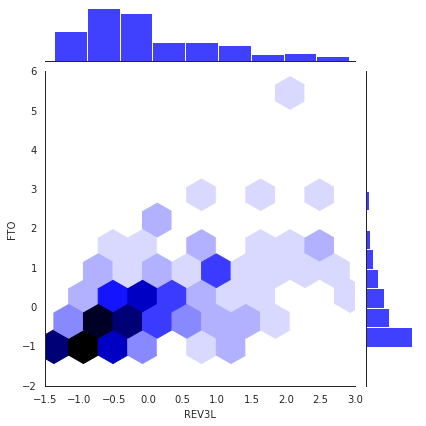

In [15]:
with sns.axes_style('white'):
    sns.jointplot("REV3L", "FTO", mrna_needed, kind='hex')

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


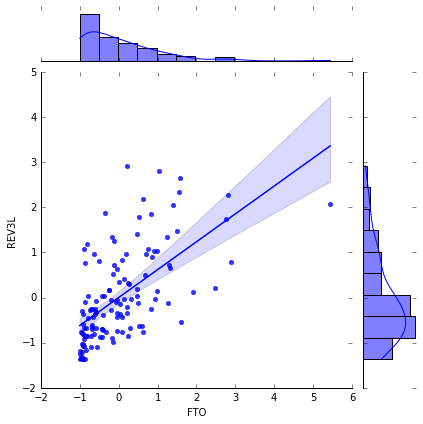

In [16]:
sns.jointplot("FTO", "REV3L", data=mrna_needed, kind='reg');

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


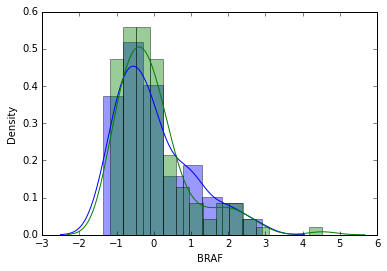

In [17]:
sns.distplot(mrna_needed['REV3L'])
sns.distplot(mrna_needed['BRAF']);

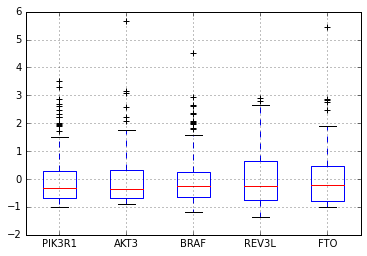

In [26]:
df_box = mrna_needed[['PIK3R1', 'AKT3', 'BRAF', 'REV3L', 'FTO']]
boxplot = df_box.boxplot(column=['PIK3R1', 'AKT3', 'BRAF', 'REV3L', 'FTO'])  